# Load an Example Image for Approach Figure

Here, I use `skimage` to load, process, and output example images across channels and an example composite image with merged channels.

Note that much of this code was adapted from https://github.com/jr0th/segmentation/blob/master/visualization/CellArt.ipynb and with insights from Marzieh Haghighi.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage.io
import skimage.exposure

from pycytominer.aggregate import AggregateProfiles

In [2]:
sys.path.append("../scripts")
from grabPictures import grabPicture

## Set File Paths

In [3]:
bucket_path = "/home/ubuntu/bucket/projects/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/"
image_path = os.path.join(bucket_path, "CRISPR_PILOT_B1/images/")
sqlite_path = os.path.join(bucket_path, "workspace/backend/CRISPR_PILOT_B1/")
metadata_path = os.path.join("data", "metadata")

In [4]:
plate = "SQ00014613"
sqlite_dir = os.path.join(sqlite_path, plate)
sqlite_file = "sqlite:///{}/{}.sqlite".format(sqlite_dir, plate)
sqlite_file

'sqlite:////home/ubuntu/bucket/projects/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/backend/CRISPR_PILOT_B1/SQ00014613/SQ00014613.sqlite'

In [5]:
barcode_file = os.path.join(metadata_path, "barcode_platemap.csv")
platemap_name = pd.read_csv(barcode_file).query("Assay_Plate_Barcode == @plate").Plate_Map_Name.values[0]
platemap_path = os.path.join(metadata_path, "platemap", "{}.csv".format(platemap_name))

## Process Data and Load Example Images

In [6]:
gene_name = "EMPTY"
pert_name = "EMPTY"
site = 1

In [7]:
example_image = grabPicture(
    bucket_path=bucket_path,
    image_path=image_path,
    sqlite_path=sqlite_path,
    metadata_path=metadata_path,
    plate=plate,
    aggregate_strata_cols=["Image_Metadata_Plate", "Image_Metadata_Well"],
    gene_name=gene_name,
    pert_name=pert_name,
    site=site,
)

In [8]:
example_image.load_image_table(get_well=True)

In [9]:
# Prep images with a narrow crop
example_image.prep_images(low_prop=0.1, high_prop=0.2)

## Output an Example Image

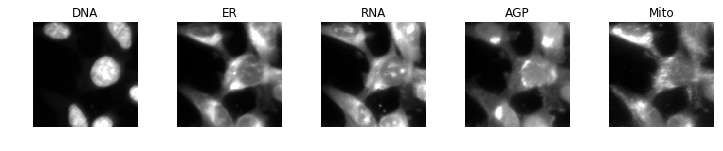

In [10]:
example_image.plot_images(cropped=True, color=False)

output_file = os.path.join("figures", "example_images", "greyscale_channel.png")
plt.subplots_adjust(top=0.8)
plt.savefig(output_file, pad_inches=0.2, dpi=500)

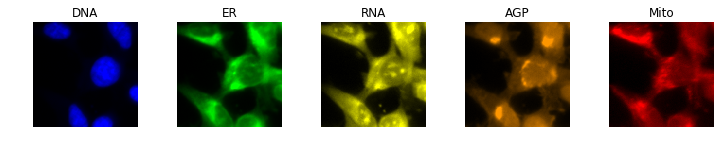

In [11]:
example_image.plot_images(cropped=True, color=True)

output_file = os.path.join("figures", "example_images", "color_channel.png")
plt.subplots_adjust(top=0.8)
plt.savefig(output_file, pad_inches=0.2, dpi=500)

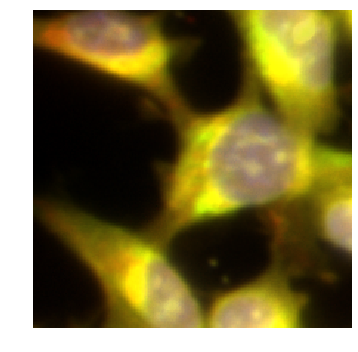

In [12]:
example_image.plot_combined_image()

output_file = os.path.join("figures", "example_images", "color_merged.png")
plt.savefig(output_file, dpi=500)